In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype 
from sklearn import model_selection, metrics

import pickle

import os
os.getcwd()

'D:\\NUS\\GitHub\\BT4222_GrpProject'

In [15]:
data = pd.read_csv("./Output/data_clean&processed_addedsentiment.csv")
#data = data.drop('Unnamed: 0', axis=1)

In [16]:
data.shape

(3419, 53)

In [17]:
data.sample(3)

,id_row,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,...,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments,story_afinn,faq_comments_afinn,blurb_name_afinn,blurb_afinn,name_afinn
2229,2234,397,Volume 5 of the critically acclaimed online co...,"{'id': 253, 'name': 'Webcomics', 'slug': 'comi...",22989,US,2014-09-23 15:59:42,USD,2014-11-09 16:44:00,1.000000,...,0,57.907607,0.0,Volume 5 of the critically acclaimed online co...,na,0.0,0.0,3.0,3.0,0.0
575,575,15,The law on assisted dying in the UK remains on...,"{'id': 30, 'name': 'Documentary', 'slug': 'fil...",8143,GB,2017-07-12 05:29:04,USD,2017-11-30 11:54:00,1.382164,...,0,403.133333,-1.0,The law on assisted dying in the UK remains on...,[' ']No comments yet.,9.0,-1.0,-7.0,-5.0,-2.0
764,764,152,Help ViceVersa Magazine continue to provide a ...,"{'id': 361, 'name': 'Web', 'slug': 'journalism...",14635,US,2016-09-29 11:45:21,USD,2016-11-23 00:09:00,1.000000,...,0,96.282895,-1.0,Help ViceVersa Magazine continue to provide a ...,[' ']No comments yet.,13.0,-1.0,6.0,4.0,2.0


In [18]:
data.columns

Index(['id_row', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'current_currency',
       'deadline', 'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name',
       'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'story', 'faq', 'num_faq', 'comments', 'n_comments',
       'duration', 'parent_category', 'category_name', 'location_name',
       'month_launched', 'year_launched', 'backers_count_log', 'goal_log',
       'pledged_log', 'duration_log', 'n_comments_log', 'num_faq_bool',
       'avg_fund_per_backer', 'comments_afinn', 'blurb_name', 'faq_comments',
       'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn', 'blurb_afinn',
       'name_afinn'],
      dtype='object')

In [19]:
data.isna().sum()

id_row                      0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
fx_rate                     0
goal                        0
id                          0
launched_at                 0
location                    0
name                        0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type                    0
story                       0
faq                         0
num_faq                     0
comments                    0
n_comments                  0
duration                    0
parent_cat

# SVM

In [20]:
from sklearn.svm import SVC

In [21]:
cols_to_drop = ['profile', 'category', 'created_at', 'location', 'current_currency', 'deadline', 'id', 
                'launched_at', 'slug', 'source_url', 'state_changed_at', 'urls', 'static_usd_rate', 
                'usd_pledged', 'converted_pledged_amount', 'spotlight', 'name_afinn', 'blurb_afinn','comments_afinn']

data_new = data.drop(cols_to_drop, axis=1)
data_new.columns

Index(['id_row', 'backers_count', 'blurb', 'country', 'fx_rate', 'goal',
       'name', 'pledged', 'staff_pick', 'state', 'usd_type', 'story', 'faq',
       'num_faq', 'comments', 'n_comments', 'duration', 'parent_category',
       'category_name', 'location_name', 'month_launched', 'year_launched',
       'backers_count_log', 'goal_log', 'pledged_log', 'duration_log',
       'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer', 'blurb_name',
       'faq_comments', 'story_afinn', 'faq_comments_afinn',
       'blurb_name_afinn'],
      dtype='object')

In [22]:
#drop text features
text_to_drop = ['blurb','name','story','faq','comments','blurb_name','faq_comments', 'n_comments_log', 'num_faq_bool', 'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn']
data_new = data_new.drop(text_to_drop , axis=1)
data_new.columns

Index(['id_row', 'backers_count', 'country', 'fx_rate', 'goal', 'pledged',
       'staff_pick', 'state', 'usd_type', 'num_faq', 'n_comments', 'duration',
       'parent_category', 'category_name', 'location_name', 'month_launched',
       'year_launched', 'backers_count_log', 'goal_log', 'pledged_log',
       'duration_log', 'avg_fund_per_backer'],
      dtype='object')

In [10]:
#Looks at categorical variables

In [23]:
data_new.parent_category.value_counts()

Film & Video          500
Art                   398
Music                 340
Publishing            311
Technology            296
Games                 214
Comics                208
Food                  194
Design                193
Fashion               176
Photography           145
No Parent Category    143
Journalism            102
Dance                  73
Crafts                 73
Theater                53
Name: parent_category, dtype: int64

In [24]:
data_new.category_name.value_counts()

Illustration      129
Web               120
World Music       113
Product Design     94
Graphic Novels     94
                 ... 
Sculpture           1
Movie Theaters      1
Pop                 1
Romance             1
Cookbooks           1
Name: category_name, Length: 144, dtype: int64

In [25]:
series = pd.value_counts(data_new.category_name)
mask = series.lt(10)
series[mask].index

Index(['Academic', 'Restaurants', 'Ceramics', 'Video', 'Technology',
       'Workshops', 'Makerspaces', 'Interactive Design', 'Literary Journals',
       'Wearables', 'Comics', 'Immersive', 'Food', 'Flight', '3D Printing',
       'Kids', 'People', 'Space Exploration', 'Zines', 'Civic Design',
       'Candles', 'Television', 'Woodworking', 'Hardware', 'Printing',
       'Stationery', 'Community Gardens', 'Crochet', 'Knitting', 'Music',
       'Design', 'Apps', 'Publishing', 'Quilts', 'Pottery', 'Fashion',
       'Translations', 'Literary Spaces', 'Footwear', 'Farmer's Markets',
       'Bacon', 'Nature', 'Toys', 'Pet Fashion', 'Latin', 'Electronic Music',
       'Family', 'Weaving', 'Country & Folk', 'Social Practice', 'Photo',
       'Events', 'Embroidery', 'Robots', 'Jazz', 'Residencies',
       'Fabrication Tools', 'Camera Equipment', 'Sculpture', 'Movie Theaters',
       'Pop', 'Romance', 'Cookbooks'],
      dtype='object')

In [26]:
#group all the category_name with less than 10 count as others

data_new['category_name_grp'] = np.where(data_new['category_name'].isin(series[mask].index),'Other',data_new['category_name'])

In [27]:
data_new['category_name_grp'].value_counts()

Other             285
Illustration      129
Web               120
World Music       113
Product Design     94
                 ... 
Textiles           12
Farms              11
Punk               11
Couture            11
Blues              10
Name: category_name_grp, Length: 82, dtype: int64

In [28]:
data_new = data_new.drop(['category_name'] , axis=1)

In [17]:
data_new.location_name.value_counts()

New York                    50
London                      47
Los Angeles                 36
Chicago                     15
San Francisco               13
                            ..
Schwabenheim an der Selz     1
Lorton                       1
Caen                         1
Hobart                       1
Chandler                     1
Name: location_name, Length: 487, dtype: int64

In [31]:
#group all the location_name with less than 10 count as others

series = pd.value_counts(data_new.location_name)
mask = series.lt(10)
series[mask].index

data_new['location_name_grp'] = np.where(data_new['location_name'].isin(series[mask].index),'Other',data_new['location_name'])

data_new['location_name_grp'].value_counts()

Other             1827
Los Angeles        166
New York           153
London             144
Brooklyn            51
Chicago             50
San Francisco       47
Seattle             44
Portland            40
Atlanta             39
Minneapolis         33
Toronto             32
Austin              31
Boston              27
Denver              27
Hong Kong           25
Melbourne           24
Manhattan           24
San Diego           24
Mexico City         22
Washington          22
Phoenix             21
Montreal            21
Sydney              21
Las Vegas           20
Vancouver           20
Houston             19
Columbus            19
Philadelphia        18
Singapore           18
Paris               18
Dallas              17
Pittsburgh          17
Berlin              16
Stockholm           16
Detroit             16
Bristol             15
Kansas City         15
Orlando             14
Italia              14
Amsterdam           14
Salt Lake City      13
Copenhagen          13
Baltimore  

In [19]:
#Too imbalance, cannot grp 
#data_new = data_new.drop(['location_name_grp'] , axis=1)

In [32]:
data_new.columns

Index(['id_row', 'backers_count', 'country', 'fx_rate', 'goal', 'pledged',
       'staff_pick', 'state', 'usd_type', 'num_faq', 'n_comments', 'duration',
       'parent_category', 'location_name', 'month_launched', 'year_launched',
       'backers_count_log', 'goal_log', 'pledged_log', 'duration_log',
       'avg_fund_per_backer', 'category_name_grp', 'location_name_grp'],
      dtype='object')

## One Hot Encoding

In [33]:
#  --- Not using location name becos too many categories 
categorical_cols = ["country","staff_pick","usd_type","parent_category","category_name_grp","location_name_grp"]

In [36]:
# Split dataset
X = data_new.drop(['id_row','state','backers_count','pledged','pledged_log','duration','goal','location_name', 'num_faq', 'n_comments'], axis=1)
y = data_new.state

# set stratify = y to maintain ratio of successful:failed for train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2019, stratify = y)

In [37]:
X.columns

Index(['country', 'fx_rate', 'staff_pick', 'usd_type', 'parent_category',
       'month_launched', 'year_launched', 'backers_count_log', 'goal_log',
       'duration_log', 'avg_fund_per_backer', 'category_name_grp',
       'location_name_grp'],
      dtype='object')

In [38]:
# One Hot Encoding with training set only
OHE_df = pd.DataFrame()

for i in categorical_cols:
    OHE_df[i] = X_train[i].astype(CategoricalDtype(list(set(X[i]))))
    
    OHE_df = pd.concat([OHE_df, pd.get_dummies(X[i], prefix=i)],axis=1)

In [39]:
OHE_df = OHE_df.drop(categorical_cols, axis= 1)

X_no_cat = X.drop(categorical_cols, axis= 1)
OHE_df = pd.concat([X_no_cat, OHE_df],axis=1)

OHE_train, OHE_test, y_train, y_test = model_selection.train_test_split(OHE_df, y, test_size=0.2, random_state=2019)
print(OHE_train.shape, OHE_test.shape)

(2735, 192) (684, 192)


In [27]:
#https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

Text(0, 0.5, 'log(backers)')

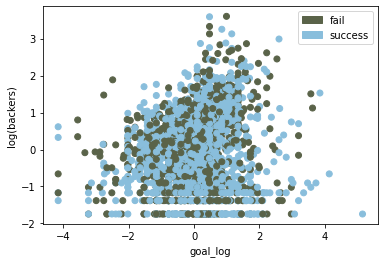

In [40]:
import matplotlib.patches as mpatches

#goal and backers
colormap = np.array(['#5a6349', '#89bedc'])

plt.scatter(X_train.goal_log, X_train.backers_count_log, c=colormap[y_train])

fail = mpatches.Patch(color='#5a6349', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("goal_log")
plt.ylabel("log(backers)")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log(fund per backer)')

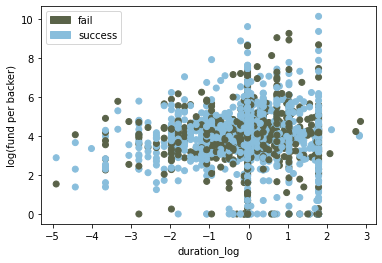

In [41]:
#duration and fund per backer
colormap = np.array(['#5a6349', '#89bedc'])

plt.scatter(X_train.duration_log, np.log(X_train.avg_fund_per_backer), c=colormap[y_train])

fail = mpatches.Patch(color='#5a6349', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("duration_log")
plt.ylabel("log(fund per backer)")


In [30]:
### No clear relationship can be drawn with numerical features

### Running SVM

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
OHE_train.columns

Index(['fx_rate', 'month_launched', 'year_launched', 'backers_count_log',
       'goal_log', 'duration_log', 'avg_fund_per_backer', 'country_AT',
       'country_AU', 'country_BE',
       ...
       'location_name_grp_Savannah', 'location_name_grp_Seattle',
       'location_name_grp_Sheffield', 'location_name_grp_Singapore',
       'location_name_grp_Stockholm', 'location_name_grp_Sydney',
       'location_name_grp_Tokyo', 'location_name_grp_Toronto',
       'location_name_grp_Vancouver', 'location_name_grp_Washington'],
      dtype='object', length=192)

In [48]:
#Get null accuracy 
y_test.value_counts().head(1) / y_test.shape

1    0.622807
Name: state, dtype: float64

In [46]:
#Base model
model = SVC(kernel='rbf', gamma="auto")

model.fit(OHE_train, y_train)
y_pred_train = model.predict(OHE_train)

print(" TRAIN ")
print(classification_report(y_train,y_pred_train))

 TRAIN 
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1008
           1       0.85      0.99      0.92      1727

    accuracy                           0.89      2735
   macro avg       0.92      0.85      0.87      2735
weighted avg       0.90      0.89      0.88      2735



In [47]:
y_pred_test = model.predict(OHE_test)
print(" TEST ")
print(classification_report(y_test,y_pred_test))

 TEST 
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       258
           1       0.85      0.99      0.92       426

    accuracy                           0.89       684
   macro avg       0.92      0.86      0.87       684
weighted avg       0.90      0.89      0.88       684



### Hyper Params Tunning --- SLOW

In [50]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=2,n_iter=5,n_jobs=-1)
grid.fit(OHE_train,y_train)
print("Best Params are: ", grid.best_params_)

In [ ]:
y_pred_train = grid.predict(OHE_train)

print(" TRAIN ")
print(classification_report(y_train,y_pred_train))

In [ ]:
y_pred_test = grid.predict(OHE_test)

print(" TEST ")
print(classification_report(y_test,y_pred_test))

### Look at features importance

In [51]:
#fit best model {'kernel': 'poly', 'gamma': 0.001, 'C': 0.01}

model = SVC(kernel='poly', gamma=0.001, C=0.01)
model.fit(OHE_train, y_train)

SVC(C=0.01, gamma=0.001, kernel='poly')

In [54]:
y_pred_train = model.predict(OHE_train)

print(" TRAIN ")
print(classification_report(y_train,y_pred_train))

y_pred_test = model.predict(OHE_test)

print(" TEST ")
print(classification_report(y_test,y_pred_test))

 TRAIN 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1008
           1       0.98      1.00      0.99      1727

    accuracy                           0.99      2735
   macro avg       0.99      0.98      0.99      2735
weighted avg       0.99      0.99      0.99      2735

 TEST 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       258
           1       0.98      0.99      0.99       426

    accuracy                           0.98       684
   macro avg       0.98      0.98      0.98       684
weighted avg       0.98      0.98      0.98       684



### Feature Importance (_coef) only works for linear kernel

In [55]:
#Fit linear model instead
model = SVC(kernel='linear', gamma=0.1, C=0.1)
model.fit(OHE_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [56]:
y_pred_train = model.predict(OHE_train)

print(" TRAIN ")
print(classification_report(y_train,y_pred_train))

y_pred_test = model.predict(OHE_test)

print(" TEST ")
print(classification_report(y_test,y_pred_test))

 TRAIN 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1008
           1       0.96      0.98      0.97      1727

    accuracy                           0.96      2735
   macro avg       0.96      0.95      0.96      2735
weighted avg       0.96      0.96      0.96      2735

 TEST 
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       258
           1       0.94      0.99      0.96       426

    accuracy                           0.95       684
   macro avg       0.96      0.94      0.95       684
weighted avg       0.95      0.95      0.95       684



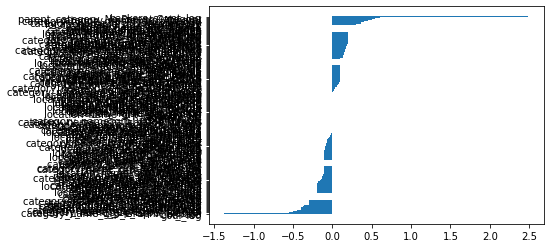

In [57]:
imp,names = zip(*sorted(zip(model.coef_[0], OHE_train.columns)))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.show()

In [58]:
#Top 10 Factors that result in failed projects

coefs_with_fns = sorted(zip(model.coef_[0], OHE_train.columns)) 
df=pd.DataFrame(coefs_with_fns)
df.columns='coefficient','word'
df[df['coefficient']<0].sort_values(by='coefficient').head(10)

,coefficient,word
0,-1.377558,goal_log
1,-0.547715,fx_rate
2,-0.501136,category_name_grp_Graphic Design
3,-0.449322,category_name_grp_Experimental
4,-0.400000,parent_category_Comics
5,-0.400000,category_name_grp_Mobile Games
6,-0.400000,category_name_grp_Webcomics
7,-0.378711,country_JP
8,-0.359156,location_name_grp_San Diego
13,-0.300000,country_AT


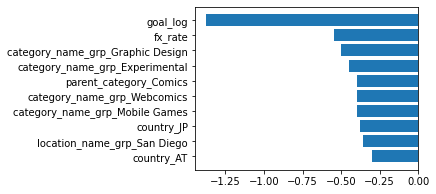

In [67]:
neg_features = df[df['coefficient']<0].sort_values(by='coefficient').head(10)
neg_features = neg_features.sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(4,3))
plt.barh(range(len(neg_features)), neg_features["coefficient"], align='center')
plt.yticks(range(len(neg_features)), neg_features["word"])
plt.show()

In [68]:
#Top 10 Factors that result in success projects

df[df['coefficient']>0].sort_values(by='coefficient', ascending=False).head(10)

,coefficient,word
191,2.488894,backers_count_log
190,0.600000,parent_category_No Parent Category
189,0.540886,category_name_grp_Apparel
188,0.500000,category_name_grp_Product Design
187,0.457853,category_name_grp_Documentary
186,0.400000,location_name_grp_Mexico City
184,0.358790,category_name_grp_Shorts
185,0.358790,country_MX
183,0.300000,category_name_grp_Rock
182,0.285911,category_name_grp_Places


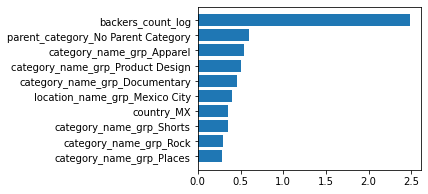

In [70]:
pos_features = df[df['coefficient']>0].sort_values(by='coefficient', ascending=False).head(10)
pos_features = pos_features.sort_values(by='coefficient')

plt.figure(figsize=(4,3))
plt.barh(range(len(pos_features)), pos_features["coefficient"], align='center')
plt.yticks(range(len(pos_features)), pos_features["word"])
plt.show()

Negative contributes to predict failed projects (goal_log, fx_rate, cat_name = Graphic design) \
Positive contributes to predict success projects (backers count, apparel, Product design)

Only works for linear kernel, cos for other higher dimensions kernel --> coef will not make sense (transform to another space, not input space)

Coef will not be related to weights 

In [74]:
#Save chosen model
model = SVC(C=0.01, gamma=0.001, kernel='poly')
pickle.dump(model, open("svm.pckl", 'wb'))